# Ruben Regalado

In [264]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [112]:
file_name = 'StudentsPerformance.csv'
DF = pd.read_csv(file_name)

In [114]:
show(DF)

# The Data
I got my data from Kaggle.com from a dataset named 'Students Performance in Exams' by Jakki Seshapanpu. This data comes from a site where the data is allowed to be used for data explorations, all that is needed to access the data is a Kaggle account. This data was gathered from various students which included their total scores, the score breakdown and indvidiual aspects of the studnets daily life before the exam was taken. 

### For this exploration, I will use the students total score as the determation of success ###

In [71]:
DF.shape

(1000, 10)

**This dataset has 1000 observations and 10 variables.**

In [128]:
DF.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

# Variable Definitions

* Gender: This is a categoral varible that tells us the gender of the observed student

* Race/Ethnicity: This is also a categorical varialbe that tells us what race group the student is in, however we dont know which race correlates to each letter.

* Parental level of eduacation: Categorical variable that tells us their parent(s) highest level of education

* lunch: Categorical variable that tells us whether or not the student had lunch before taking the exam

* test preperation course: Categorical variable that tells us if the student took a test preperation course prior to the exam

* math score: Numerical variable that tells us the studnets math score

* reading score: Numerical variable that tells us the studnets reading score

* writing score: Numerical variable that tells us the studnets writing score



# Categorical Breakdowns

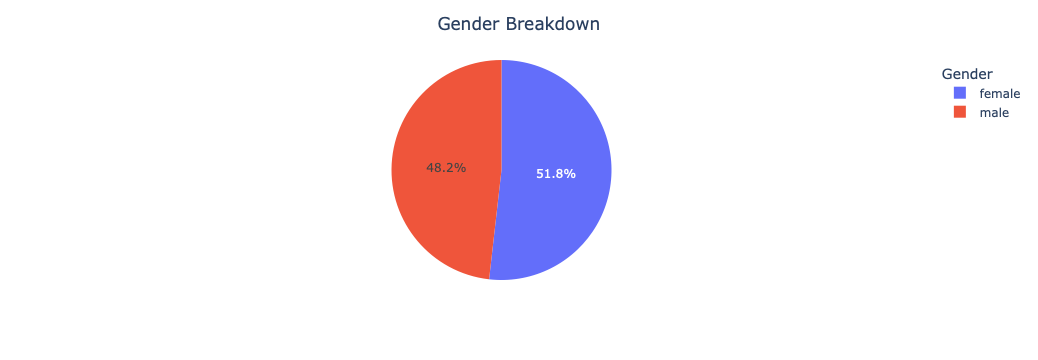

In [132]:
fig = px.pie(DF,
             names='gender')
fig.update_layout(title=" Gender Breakdown",
                  title_x=0.5,
                  legend_title="Gender")
fig.show()

We can see that the majority of students in this data set were female, while the majority the margin isnt large so we can say the data is fairly even with the number of men and womens exam scores

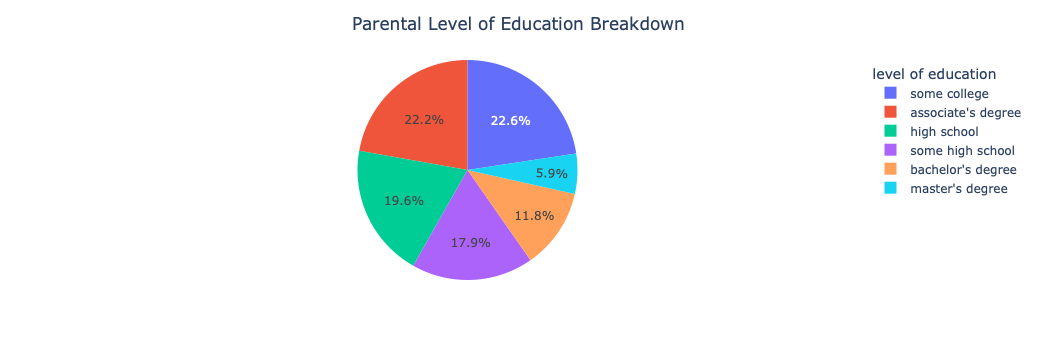

In [159]:
fig = px.pie(DF,
             names='parental level of education')
fig.update_layout(title=" Parental Level of Education Breakdown",
                  title_x=0.5,
                  legend_title="level of education")
fig.show()

In this we can see that the majority of the parents have some sort of college education but as the level of degree rises, their margins shrink. This is very imporant as we will use this variable as a focal point in the data exploration

# creating a new variable

In [142]:
DF['total score'] = DF['reading score'] + DF['writing score'] + DF['writing score']
show(DF)

**I decided to combine the 3 score sections of the exam to make it easier to compare each student to eachother.**

# Does the students parents' level of education relate to the overall success of their child?

In [233]:
order =  ["some high school","high school", "some college", "associate's degree","bachelor's degree","master's degree"]
DF['parental level of education'] = pd.Categorical(DF['parental level of education'], categories=order, ordered=True)



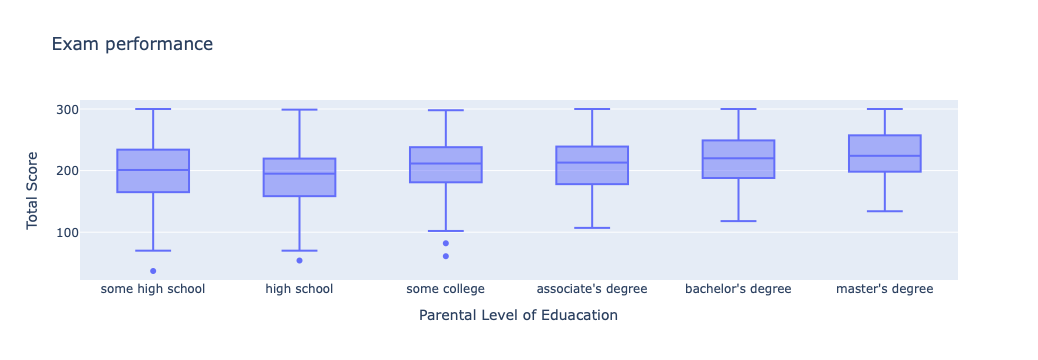

In [244]:
fig = px.box(
    DF,
    x='parental level of education',  
    y='total score',  
    title='Exam performance',
    
)
fig.update_layout(
    xaxis_title='Parental Level of Eduacation',
                  yaxis_title='Total Score',
    xaxis=dict(
        categoryorder="array",
        categoryarray=order  
    )
)

fig.show()

### As shown in the bar graph we can see that while the parents level of education  doesnt limit the potential to score high on the exam, there is a steady increase in the minimum score for the students in each education level and that the mean score does tend to rise as the parents level of education increases. Considering this information, we can infer that as the parental level of education of each students rises, the student has a higher chance of recieving a higher overall score on their exam

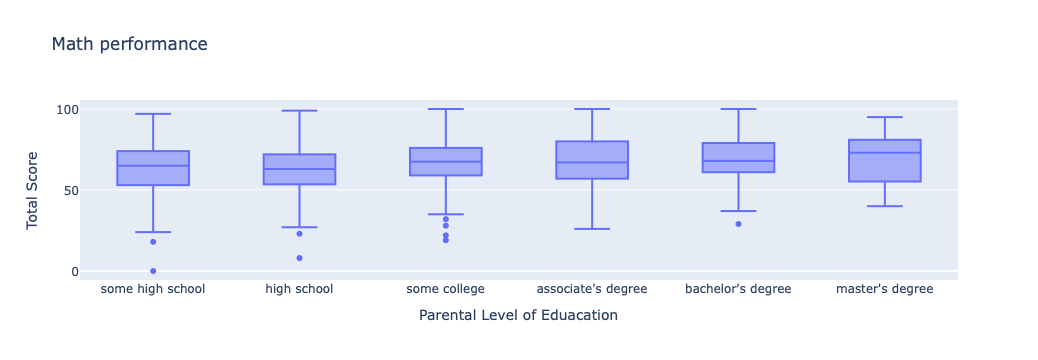

In [255]:
fig = px.box(
    DF,
    x='parental level of education',  
    y='math score',  
    title='Math performance',
    
)
fig.update_layout(
    xaxis_title='Parental Level of Eduacation',
                  yaxis_title='Total Score',
    xaxis=dict(
        categoryorder="array",
        categoryarray=order  
    )
)

fig.show()

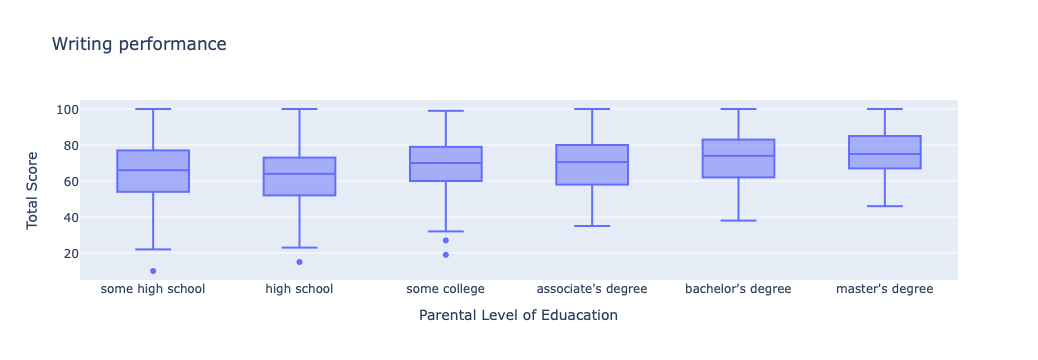

In [257]:
fig = px.box(
    DF,
    x='parental level of education',  
    y='writing score',  
    title='Writing performance',
    
)
fig.update_layout(
    xaxis_title='Parental Level of Eduacation',
                  yaxis_title='Total Score',
    xaxis=dict(
        categoryorder="array",
        categoryarray=order  
    )
)

fig.show()

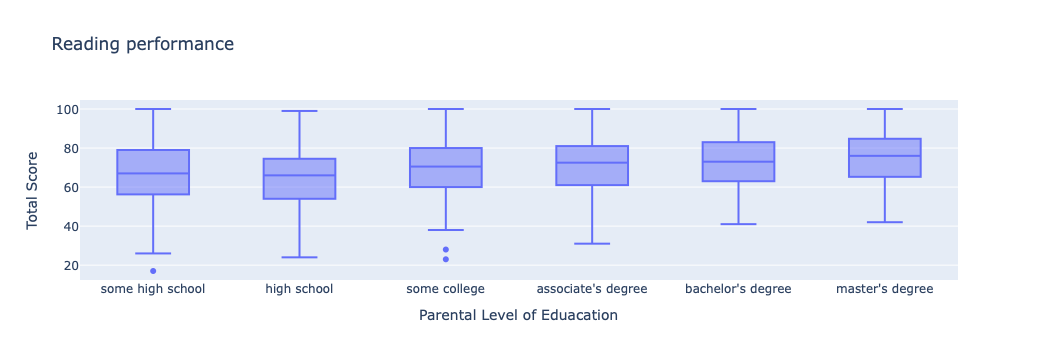

In [261]:
fig = px.box(
    DF,
    x='parental level of education',  
    y='reading score',  
    title='Reading performance',
    
)
fig.update_layout(
    xaxis_title='Parental Level of Eduacation',
                  yaxis_title='Total Score',
    xaxis=dict(
        categoryorder="array",
        categoryarray=order  
    )
)

fig.show()

### Even if we decide to breakdown the score into the 3 graded sections, we mostly see the same pattern in scores in relation to the parental level of education. Overall, as the Parental level of education of the repsective student rises, they have a higher chance of receiving a higher score in the exam. This could possibly relate to the importance of education in each respective household, if a child lives in a household where their parents have recieved a higher education, the student is more likely to value education and their parents are likely to have higher expectations of their childrens scores